In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

# for downloading data from Quandl
from pandas_datareader import data, wb
import pandas_datareader as pdr

In [2]:
API_KEY = 'aUPXTxxeiF7Yy1hE6Nzj'

In [3]:
FIGSIZE = (14, 8)

In [4]:
stocks = ['AAPL', 'GE', 'BA', 'WMT', 'KO', 'JPM', 'CVX', 'CAH', 'XOM', 'IBM', 'INTC']
#apple, General Electric, Boeing, Wallmart, CocaCola, JP morgan Chase, Chevron, Caridnal Health , Exxon Mobile, IBM, INTEL

In [5]:
def load_stock(ticker, start_year=None):
    
    if start_year is None:
        start_year = datetime(1990, 1, 1).date().isoformat()
    
    stock = pdr.quandl.QuandlReader(symbols=ticker, 
                                 start=datetime(1990, 1, 1).date().isoformat(), 
                                 end=None, 
                                 retry_count=3, 
                                 pause=0.001, 
                                 session=None, 
                                 chunksize=25, 
                                 api_key = API_KEY)
    
    df = stock.read()
    return df['AdjClose']

In [6]:
stocks_dict = dict()
for stock in stocks:
    s = load_stock(stock)
    stocks_dict[stock] = s


In [8]:
df = pd.DataFrame(stocks_dict)

In [10]:
df.describe()

,AAPL,GE,BA,WMT,KO,JPM,CVX,CAH,XOM,IBM,INTC
count,7113.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7113.000000
mean,28.289037,16.493543,55.312598,36.883780,20.083142,29.686536,44.489173,31.802484,40.324755,78.786426,16.389886
std,43.039528,8.708866,53.024816,22.464718,11.398914,21.468610,34.532567,21.988505,27.364812,52.627419,10.799943
min,0.415743,1.963838,10.159097,3.494950,2.288171,1.382799,5.936076,1.687402,4.895955,7.056547,0.600942
25%,1.229236,8.811449,23.520638,10.739190,14.116934,14.639068,16.382365,14.258881,14.825284,26.112476,9.860075
50%,3.080479,17.730557,36.327812,38.652699,17.612696,27.657321,27.252469,32.214425,29.447601,70.895050,16.012265
75%,43.196105,23.359232,64.182988,46.009036,26.727743,36.316952,72.689655,39.384885,67.032577,123.949409,21.470148
max,181.720000,35.006100,364.640000,109.550000,48.530000,118.770000,133.600000,86.923126,92.545338,186.405408,52.480000


In [13]:
df.head()

,AAPL,GE,BA,WMT,KO,JPM,CVX,CAH,XOM,IBM,INTC
Date,,,,,,,,,,,
1990-01-02,1.118093,2.537067,11.542708,4.054211,2.693998,3.732964,6.386016,2.071873,5.371737,14.138144,0.742667
1990-01-03,1.125597,2.532126,11.824237,4.054211,2.655315,3.857396,6.282539,2.093233,5.318020,14.263656,0.722038
1990-01-04,1.129499,2.518063,11.777316,4.033561,2.642190,3.923345,6.201236,2.093233,5.264302,14.426678,0.737510
1990-01-05,1.133101,2.494118,11.614029,3.990541,2.620776,3.939734,6.108846,2.135952,5.237444,14.390611,0.732353
1990-01-08,1.140605,2.508561,11.752916,4.043886,2.676728,3.939734,6.167052,2.093233,5.318020,14.480057,0.742667


In [14]:
df.to_pickle('..//data//raw_data.pkl')

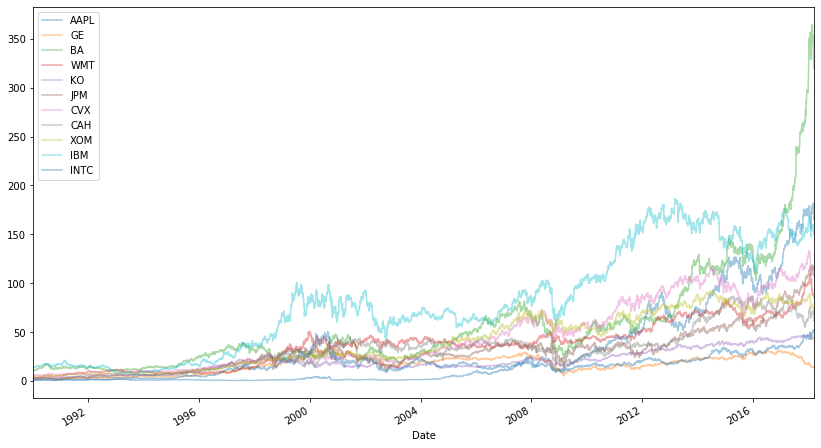

In [149]:
df.plot(alpha=0.4, figsize=FIGSIZE)

In [150]:
df.head()

,AAPL,GE,BA,WMT,KO,JPM,CVX,CAH,XOM,IBM,INTC
Date,,,,,,,,,,,
1990-01-02,1.118093,2.537067,11.542708,4.054211,2.693998,3.732964,6.386016,2.071873,5.371737,14.138144,0.742667
1990-01-03,1.125597,2.532126,11.824237,4.054211,2.655315,3.857396,6.282539,2.093233,5.318020,14.263656,0.722038
1990-01-04,1.129499,2.518063,11.777316,4.033561,2.642190,3.923345,6.201236,2.093233,5.264302,14.426678,0.737510
1990-01-05,1.133101,2.494118,11.614029,3.990541,2.620776,3.939734,6.108846,2.135952,5.237444,14.390611,0.732353
1990-01-08,1.140605,2.508561,11.752916,4.043886,2.676728,3.939734,6.167052,2.093233,5.318020,14.480057,0.742667


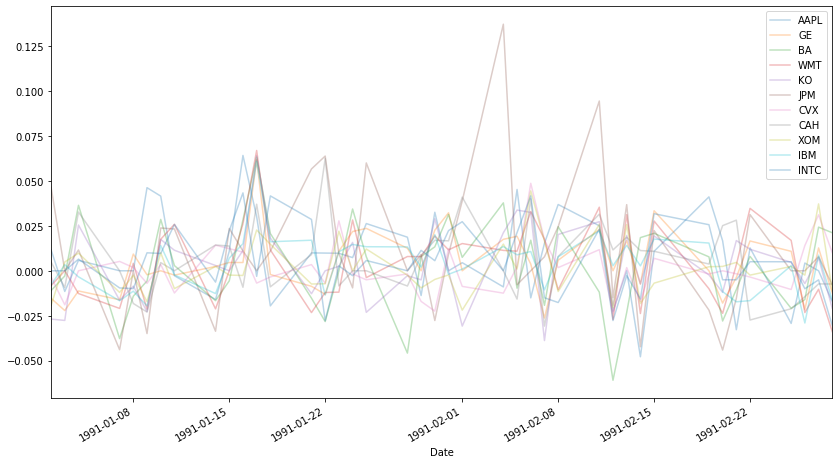

In [112]:
df.pct_change().loc[(df.index.year==1991) & (df.index.month<3)].plot(alpha=0.3, figsize=FIGSIZE)

In [152]:
means = list()
_index = list(range(1991,2018))
for y in _index:
    a = np.mean(df.pct_change().loc[(df.index.year==y) & (df.index.month<7)])
    means.append(a)

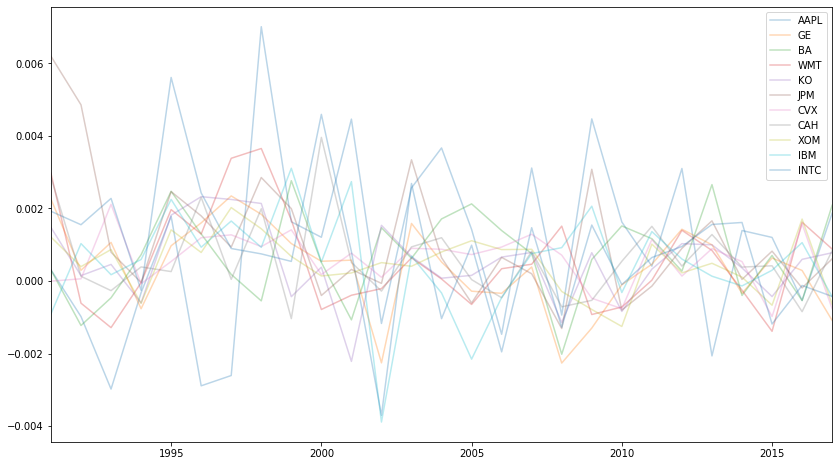

In [154]:
pd.DataFrame(means, index=_index).plot(figsize=FIGSIZE, alpha=0.3)

In [138]:
covars = list()
_index = list(range(1991,2018))
for y in _index:
    a = np.corrcoef(df.pct_change().loc[(df.index.year==y) & (df.index.month<7)].T)
    covars.append(a.flatten())

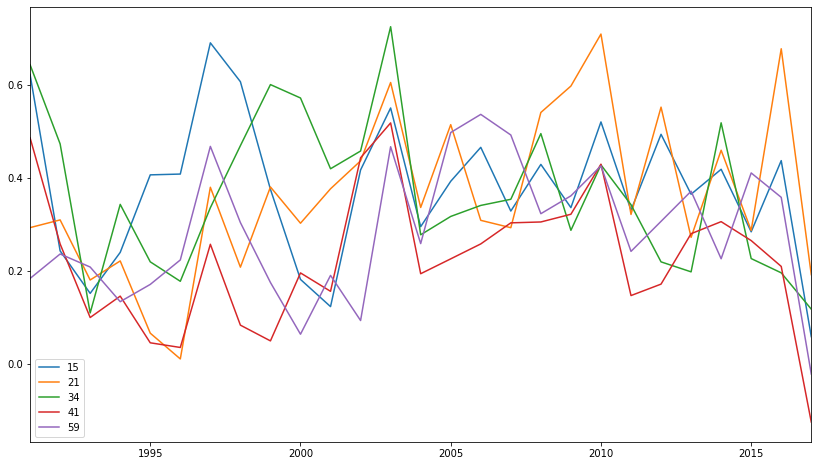

In [140]:
pd.DataFrame(covars, index=_index)[[15,21,34,41,59]].plot(figsize=FIGSIZE)

In [158]:
apl = df.pct_change()['AAPL']

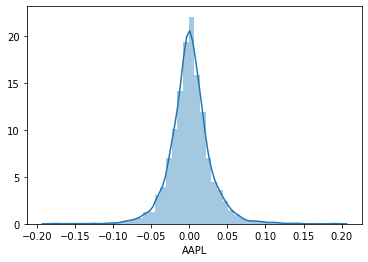

In [162]:
sbn.distplot(apl.loc[(apl <0.2) & (apl > -0.2)])